In [82]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder


In [83]:
na_values = ["unknown"]

In [84]:
df = pd.read_csv('base_train.csv',
                 na_values=na_values,
                 sep=',')

In [85]:
print(f"Cantidad de filas : {df.shape[0]}")
print(f"Cantidad de columnas : {df.shape[1]}")

Cantidad de filas : 31478
Cantidad de columnas : 21


In [86]:
def plot_dist(val):
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.boxplot(x =val, ax=ax_box)
    sns.distplot(val, ax=ax_hist)
    plt.show()

#### VISTA DE VARIABLES

In [87]:
df.columns

Index(['ID', 'EDAD', 'TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO',
       'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES', 'CAMPANA',
       'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'RESULT_PREVIO',
       'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC',
       'ACEPTACION'],
      dtype='object')

In [88]:
df.dtypes

ID                     int64
EDAD                   int64
TRABAJO               object
ESTADO_CIVIL          object
EDUCACION             object
INCUMPLIMIENTO        object
VIVIENDA              object
PRESTAMO              object
TIPO_CONTACTO         object
MES                   object
CAMPANA                int64
NRO_DIAS_CONTACTO      int64
CONTACTOS_PREVIOS      int64
RESULT_PREVIO         object
TASA_VAR_EMP         float64
IPC                  float64
ICC                  float64
INGRESO              float64
MONTO_DEUDA          float64
MONTO_TRANSAC        float64
ACEPTACION             int64
dtype: object

<AxesSubplot: >

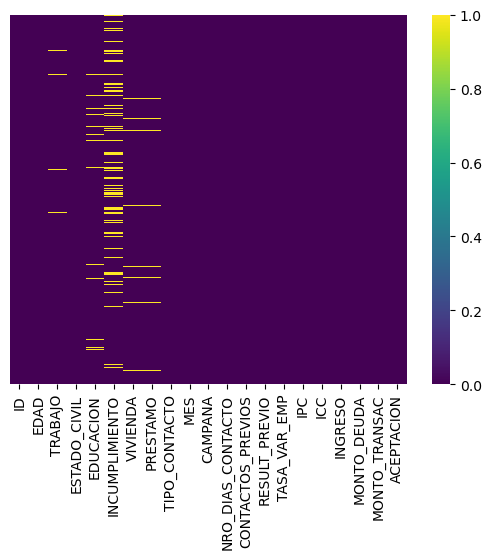

In [89]:
# Visualización grafica de los valores nulos
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [90]:
# Cantidad de datos nulos por variable
df.isnull().sum()

ID                      0
EDAD                    0
TRABAJO               254
ESTADO_CIVIL           62
EDUCACION            1315
INCUMPLIMIENTO       6566
VIVIENDA              738
PRESTAMO              738
TIPO_CONTACTO           0
MES                     0
CAMPANA                 0
NRO_DIAS_CONTACTO       0
CONTACTOS_PREVIOS       0
RESULT_PREVIO           0
TASA_VAR_EMP            0
IPC                     0
ICC                     0
INGRESO                 0
MONTO_DEUDA             0
MONTO_TRANSAC           0
ACEPTACION              0
dtype: int64

In [91]:
# Porcentaje de nulos por cada variable
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

INCUMPLIMIENTO       20.859013
EDUCACION             4.177521
VIVIENDA              2.344495
PRESTAMO              2.344495
TRABAJO               0.806913
ESTADO_CIVIL          0.196963
ID                    0.000000
TASA_VAR_EMP          0.000000
MONTO_TRANSAC         0.000000
MONTO_DEUDA           0.000000
INGRESO               0.000000
ICC                   0.000000
IPC                   0.000000
CAMPANA               0.000000
RESULT_PREVIO         0.000000
CONTACTOS_PREVIOS     0.000000
NRO_DIAS_CONTACTO     0.000000
EDAD                  0.000000
MES                   0.000000
TIPO_CONTACTO         0.000000
ACEPTACION            0.000000
dtype: float64


In [92]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('El número total de filas con valores que faltan es:', count)
print('ya que es el',round((count/len(df.index))*100), '% de todo el conjunto de datos, estas filas no se pueden quitar debido a que causarian mucho error al conjunto de datos.')

El número total de filas con valores que faltan es: 8138
ya que es el 26 % de todo el conjunto de datos, estas filas no se pueden quitar debido a que causarian mucho error al conjunto de datos.


- El tratamiento de nulos los realizaremos al ingresar a la visualización de cada variable

In [93]:
df.select_dtypes('object').columns

Index(['TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO', 'VIVIENDA',
       'PRESTAMO', 'TIPO_CONTACTO', 'MES', 'RESULT_PREVIO'],
      dtype='object')

#### EDAD

- Tenemos valores outliers en la variable edad, valore mayores a 65 y menores a 21. Por el momento se desconoce el origen de esto ya que puede ser por error humano, casos muy atipicos o mal llenado de informacion del cliente. En esta situacion al ser pocos los valores con errores se optará por eliminar estas observaciones con el fin de no alterar la distribución con inputacion del promedio o mediana.

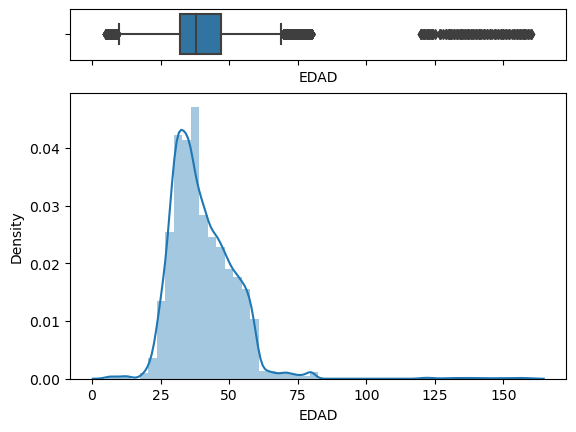

In [94]:
plot_dist(df['EDAD'])

In [95]:
df = df[(df['EDAD'] <65) & (df['EDAD'] >20)]

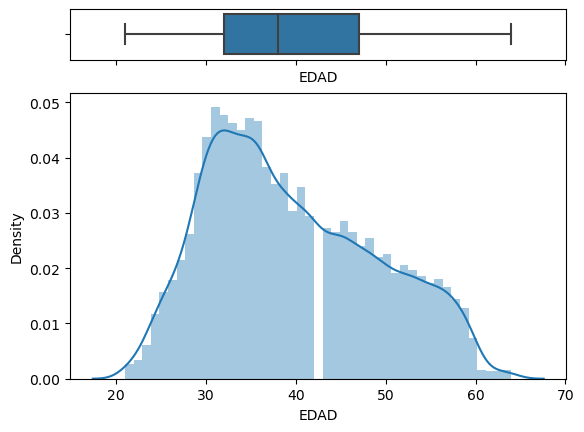

In [96]:
plot_dist(df['EDAD'])

#### TRABAJO

In [97]:
# Imputamos la variable TRABAJO con la moda
df['TRABAJO'].fillna(df['TRABAJO'].mode()[0], inplace=True)
print("Valores perdidos en TRABAJO: " + 
      str(df['TRABAJO'].isnull().sum()))

Valores perdidos en TRABAJO: 0


In [98]:
df.TRABAJO.value_counts()

admin.           8116
blue-collar      7034
technician       5104
services         2988
management       2204
self-employed    1096
entrepreneur     1092
retired           883
housemaid         779
unemployed        761
student           545
Name: TRABAJO, dtype: int64

In [99]:
df.groupby('TRABAJO').ACEPTACION.count().sort_values(ascending=False)

TRABAJO
admin.           8116
blue-collar      7034
technician       5104
services         2988
management       2204
self-employed    1096
entrepreneur     1092
retired           883
housemaid         779
unemployed        761
student           545
Name: ACEPTACION, dtype: int64

In [100]:
df.groupby('TRABAJO').ACEPTACION.mean().sort_values(ascending=False)

TRABAJO
student          0.289908
retired          0.140430
unemployed       0.137976
admin.           0.131469
technician       0.107367
self-employed    0.104015
management       0.103448
housemaid        0.082157
entrepreneur     0.078755
services         0.075301
blue-collar      0.069235
Name: ACEPTACION, dtype: float64

In [101]:
df['TRABAJO'] = df.groupby('TRABAJO')['ID'].transform('count').astype('int')

<AxesSubplot: xlabel='TRABAJO', ylabel='count'>

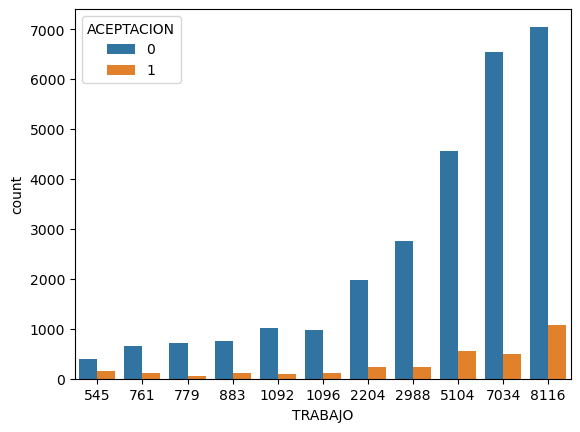

In [102]:
sns.countplot(x=df.TRABAJO, hue=df.ACEPTACION)

#### ESTADO CIVIL

In [103]:
df['ESTADO_CIVIL'].isnull().sum()

59

In [104]:
# Imputamos la variable ESTADO_CIVIL con la moda
df['ESTADO_CIVIL'].fillna(df['ESTADO_CIVIL'].mode()[0], inplace=True)
print("Valores perdidos en ESTADO_CIVIL: " + 
      str(df['ESTADO_CIVIL'].isnull().sum()))

Valores perdidos en ESTADO_CIVIL: 0


In [105]:
# # Eliminamos las filas con missing values en ESTADO_CIVIL
# df.dropna(subset=['ESTADO_CIVIL'], inplace=True)

# # Comprobamos que se han eliminado
# print("valores perdidos en ESTADO_CIVIL: " + 
#       str(df['ESTADO_CIVIL'].isnull().sum()))

In [106]:
df = df.replace({'ESTADO_CIVIL':{' married':'married', 'marrid': 'married','singgle ':'single'
                            ,'single ': 'single', 'divorced ':'divorced','d_ivorced': 'divorced'}})

In [107]:
df.ESTADO_CIVIL.value_counts()

married     18643
single       8610
divorced     3349
Name: ESTADO_CIVIL, dtype: int64

In [108]:
df.groupby('ESTADO_CIVIL').ACEPTACION.mean()

ESTADO_CIVIL
divorced    0.086892
married     0.093976
single      0.135075
Name: ACEPTACION, dtype: float64

In [109]:
pd.get_dummies(df['ESTADO_CIVIL'])

,divorced,married,single
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
31473,0,0,1
31474,1,0,0
31475,0,0,1
31476,0,1,0


<AxesSubplot: xlabel='ESTADO_CIVIL', ylabel='count'>

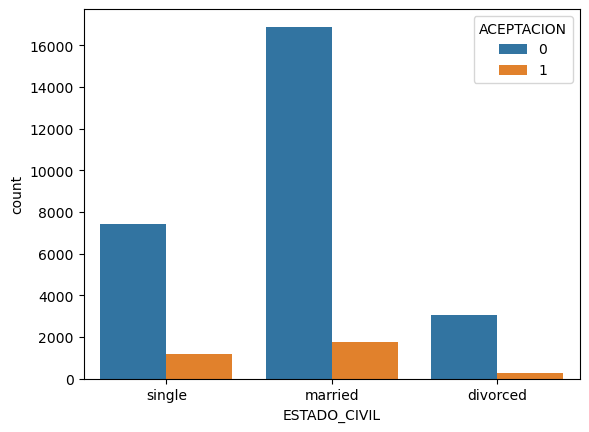

In [110]:
sns.countplot(x=df.ESTADO_CIVIL, hue=df.ACEPTACION)

In [111]:
df = pd.concat([df.drop(columns='ESTADO_CIVIL', axis=1),pd.get_dummies(df['ESTADO_CIVIL'])], axis=1)

In [131]:
df.columns

Index(['ID', 'EDAD', 'TRABAJO', 'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES',
       'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'RESULT_PREVIO',
       'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC',
       'ACEPTACION', 'divorced', 'married', 'single', 'EDUCACION-encoded'],
      dtype='object')

#### EDUCACION

In [112]:
df['EDUCACION'].isnull().sum()

1212

In [113]:
# Imputamos la variable EDUCACION con la moda
df['EDUCACION'].fillna(df['EDUCACION'].mode()[0], inplace=True)
print("Valores perdidos en EDUCACION: " + 
      str(df['EDUCACION'].isnull().sum()))

Valores perdidos en EDUCACION: 0


In [114]:
df['EDUCACION'].value_counts()

university.degree      10311
high.school             7110
basic.9y                4587
professional.course     3949
basic.4y                2915
basic.6y                1714
illiterate                16
Name: EDUCACION, dtype: int64

<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

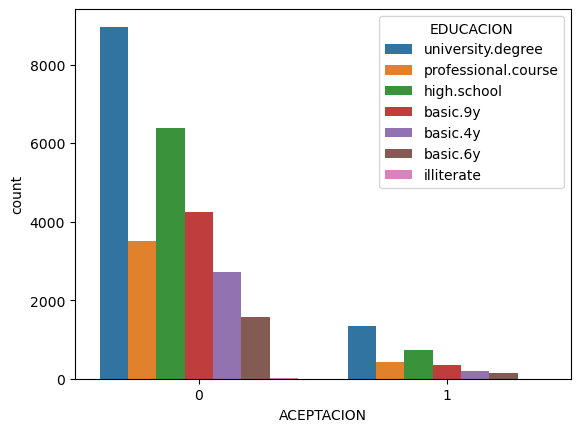

In [115]:
sns.countplot(x=df.ACEPTACION, hue=df.EDUCACION)

In [116]:
df.EDUCACION.value_counts()

university.degree      10311
high.school             7110
basic.9y                4587
professional.course     3949
basic.4y                2915
basic.6y                1714
illiterate                16
Name: EDUCACION, dtype: int64

In [117]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["illiterate",
                                      "basic.4y","basic.6y",
                                      "basic.9y","high.school",
                                      "professional.course",
                                      "university.degree"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df[["EDUCACION"]])
df["EDUCACION-encoded"] = encoder.transform(df[["EDUCACION"]])
df.drop(['EDUCACION'], axis=1, inplace=True)

#### INCUMPLIMIENTO

In [118]:
df['INCUMPLIMIENTO'].isnull().sum()

6473

In [119]:
df.INCUMPLIMIENTO.value_counts()

no     24126
yes        3
Name: INCUMPLIMIENTO, dtype: int64

In [120]:
df.INCUMPLIMIENTO.value_counts(normalize=True)

no     0.999876
yes    0.000124
Name: INCUMPLIMIENTO, dtype: float64

<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

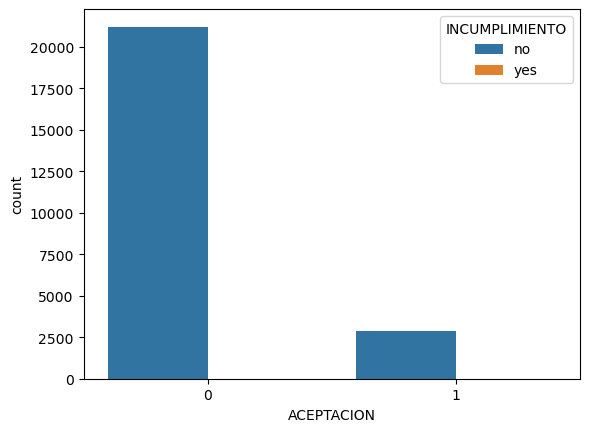

In [121]:
sns.countplot(x=df.ACEPTACION, hue=df.INCUMPLIMIENTO)

In [122]:
# Eliminamos esta variable debido a que no generara impacto en uno de sus segmentos por tener información insuficiente
df.drop(['INCUMPLIMIENTO'], axis=1, inplace=True)

#### VIVIENDA

In [123]:
df['VIVIENDA'].isnull().sum()

719

In [124]:
df.VIVIENDA.value_counts()

yes    16018
no     13865
Name: VIVIENDA, dtype: int64

In [125]:
# Imputamos la variable VIVIENDA con la moda
df['VIVIENDA'].fillna(df['VIVIENDA'].mode()[0], inplace=True)
print("Valores perdidos en VIVIENDA: " + 
      str(df['VIVIENDA'].isnull().sum()))

Valores perdidos en VIVIENDA: 0


<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

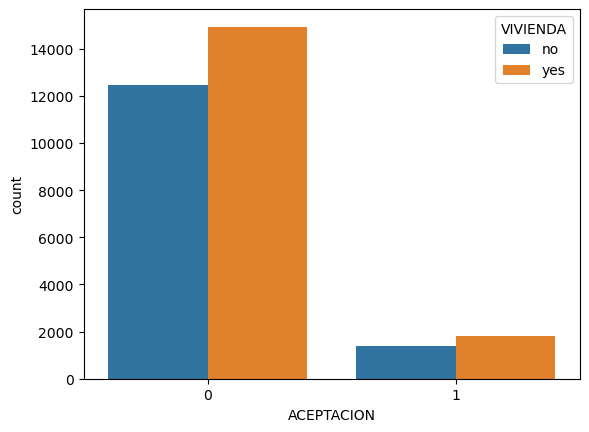

In [126]:
sns.countplot(x=df.ACEPTACION, hue=df.VIVIENDA)

#### PRESTAMO

In [127]:
df['PRESTAMO'].isnull().sum()

719

In [128]:
df.PRESTAMO.value_counts()

no     25263
yes     4620
Name: PRESTAMO, dtype: int64

In [129]:
# Imputamos la variable PRESTAMO con la moda
df['PRESTAMO'].fillna(df['PRESTAMO'].mode()[0], inplace=True)
print("Valores perdidos en PRESTAMO: " + 
      str(df['PRESTAMO'].isnull().sum()))

Valores perdidos en PRESTAMO: 0


<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

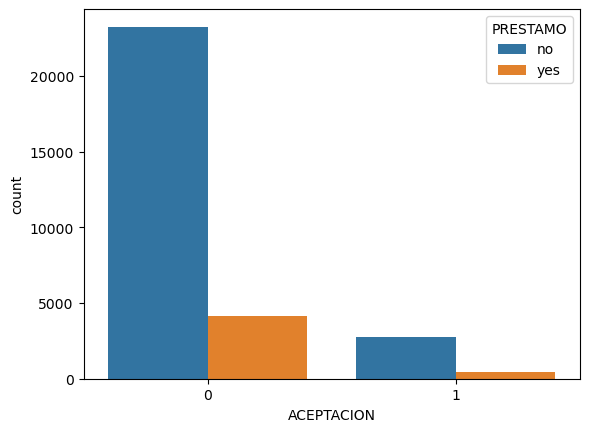

In [130]:
sns.countplot(x=df.ACEPTACION, hue=df.PRESTAMO)

#### TIPO_CONTACTO

In [68]:
df.TIPO_CONTACTO.value_counts()

cellular     19964
telephone    11514
Name: TIPO_CONTACTO, dtype: int64

<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

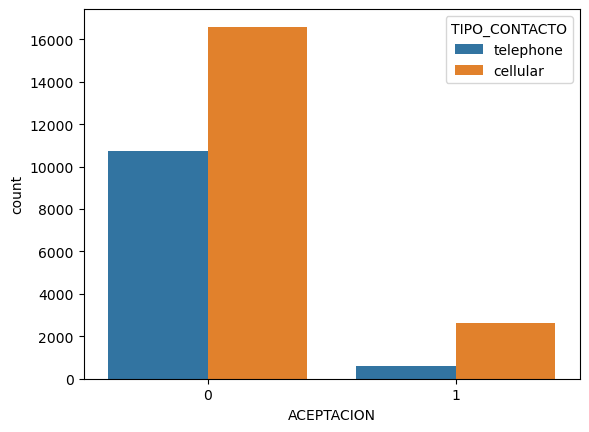

In [31]:
sns.countplot(x=df.ACEPTACION, hue=df.TIPO_CONTACTO)

#### MES

In [69]:
df.MES.value_counts()

may    10535
sep     5463
oct     4721
jun     4047
nov     3099
apr     2030
aug      559
jul      441
mar      430
dec      153
Name: MES, dtype: int64

<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

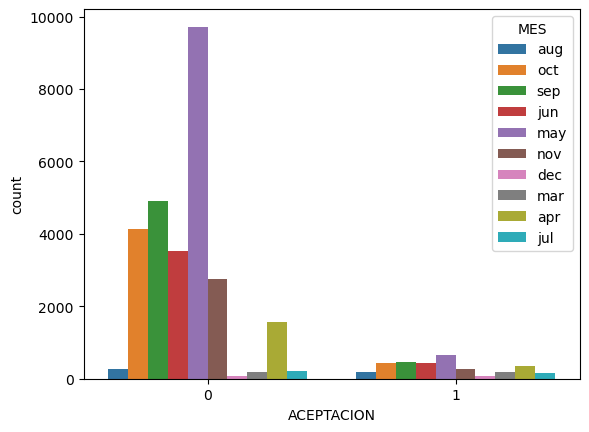

In [32]:
sns.countplot(x=df.ACEPTACION, hue=df.MES)

<AxesSubplot: xlabel='MES', ylabel='count'>

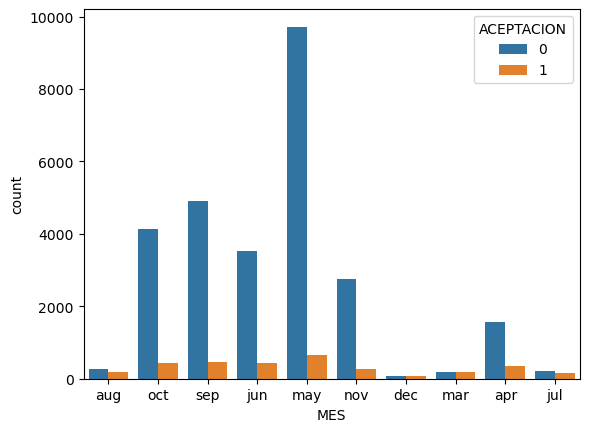

In [33]:
sns.countplot(x=df.MES, hue=df.ACEPTACION)

In [ ]:
# yo no utilizaria esta variable ya que no esta completa para todo el año

#### CAMPANA

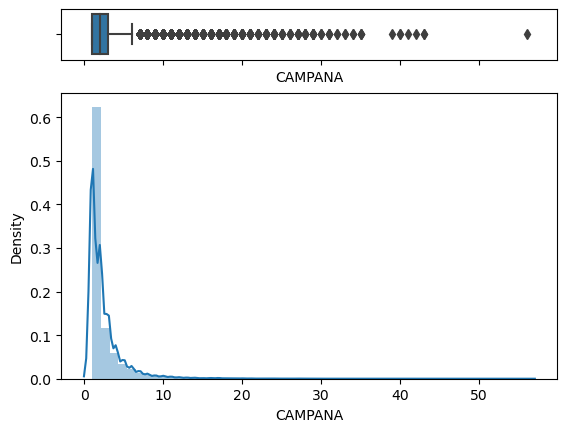

In [11]:
plot_dist(df['CAMPANA'])

#### NRO_DIAS_CONTACTO

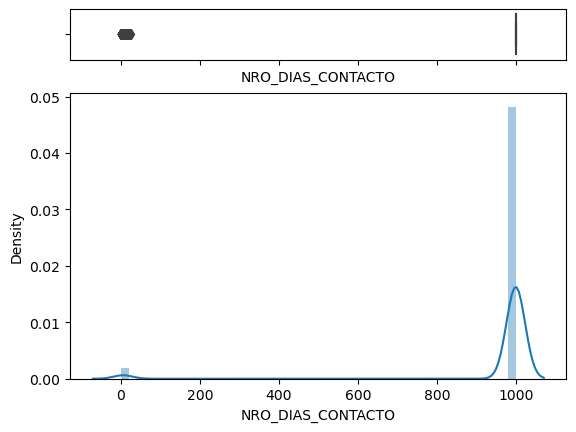

In [12]:
plot_dist(df['NRO_DIAS_CONTACTO'])

#### CONTACTOS_PREVIOS

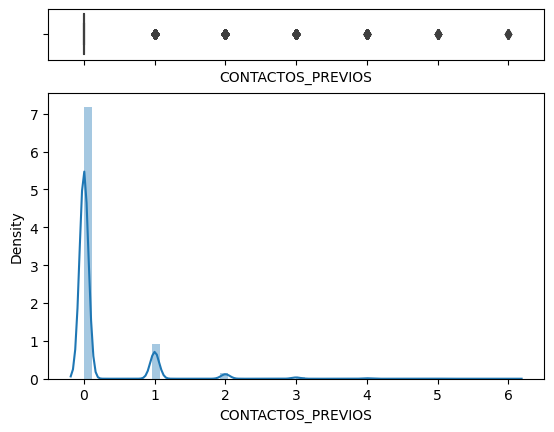

In [13]:
plot_dist(df['CONTACTOS_PREVIOS'])

In [14]:
df.CONTACTOS_PREVIOS.value_counts()

0    27136
1     3513
2      588
3      166
4       58
5       12
6        5
Name: CONTACTOS_PREVIOS, dtype: int64

<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

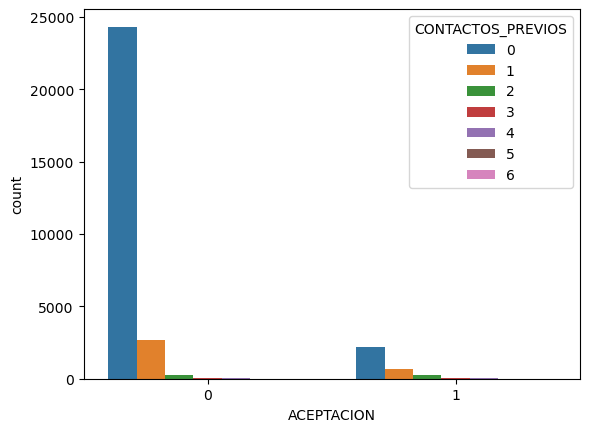

In [24]:
sns.countplot(x=df.ACEPTACION, hue=df.CONTACTOS_PREVIOS)

<AxesSubplot: xlabel='CONTACTOS_PREVIOS', ylabel='count'>

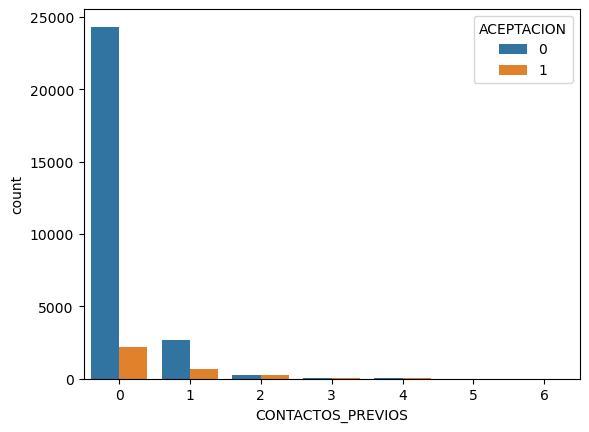

In [22]:
sns.countplot(x=df.CONTACTOS_PREVIOS, hue=df.ACEPTACION)

#### RESULT_PREVIO

In [74]:
df.RESULT_PREVIO.value_counts()

nonexistent    27136
failure         3281
success         1061
Name: RESULT_PREVIO, dtype: int64

#### TASA_VAR_EMP

In [37]:
df.TASA_VAR_EMP.value_counts()

 1.4    12253
-1.8     6775
 1.1     5892
-0.1     2765
-2.9     1131
-3.4      687
-1.7      500
-1.1      416
-3.0      114
-0.2       10
Name: TASA_VAR_EMP, dtype: int64

<AxesSubplot: xlabel='ACEPTACION', ylabel='count'>

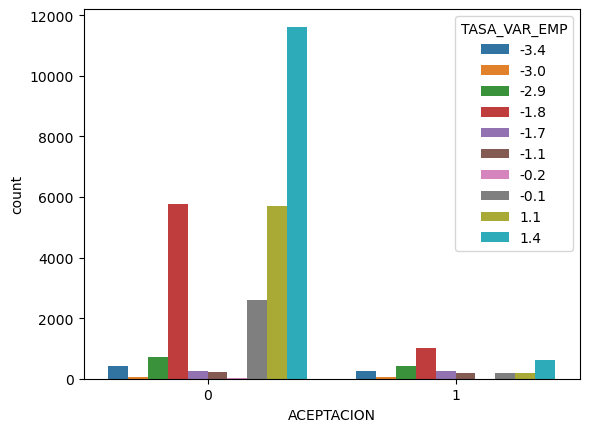

In [38]:
sns.countplot(x=df.ACEPTACION, hue=df.TASA_VAR_EMP)